##Big Mart Sales Prediction Project

##Done By: Ashwath Bala S

Table of Contents

1.Problem Statement

2.Data Dictionary

3.Importing the Required Libraries

4.Loading the Dataset

5.Null Value Treatment

6.Exploratory Data Analysis

7.Outlier Treatment

8.Data Pre-Processing

9.Model Building

10.Cross Validation

11.Model Comparison

##1. Problem Statement

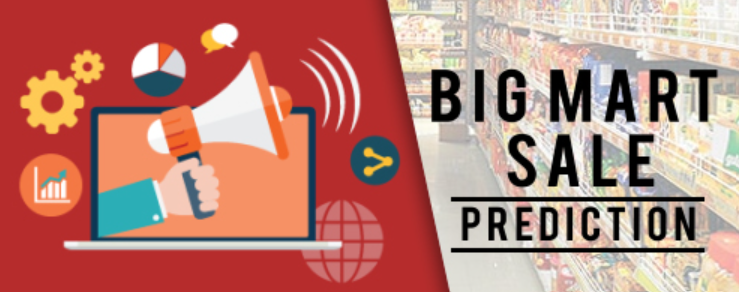

The aim of this project is to develop predictive model to forecast sales for Big Mart outlets based on historical sales data and relevant features such as store type, product category and to optimize inventory management and enhance sales strategies by accurately predicting sales trends for each outlet

##2. Data Dictionary

We have a separate train and test set, in which test set is without the Target Variable and we will be using it for Model Testing

We will be having the following columns:

Item_Identifier - unique identifier for each item

Item_Weight - weight of the item

Item_Fat_Content - categorical variable describing the fat content of the item

Item_Visibility - the percentage of total display area allocated to this particular item in all stores

Item_Type - category to which the item belongs

Item_MRP - maximum retail price of the item

Outlet_Identifier - unique identifier for each outlet

Outlet_Establishment_Year - the year in which the outlet was established

Outlet_Size - size of the outlet

Outlet_Location_Type - location type of the outlet

Outlet_Type - Type of the outlet

Item_Outlet_Sales - sales of the particular item in the particular outlet (target variable)

##3. Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##4. Loading the Dataset

In [ ]:
data= pd.read_csv('BigMartSales.csv')

In [ ]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
data.shape

(8523, 12)

##5. Null Value Treatment

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see that Item_Weight and Outlet_Size are having null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Item_Weight is numerical column so we fill it with Mean Imputation

In [ ]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Outlet_Size is catagorical column so we fill it with Mode Imputation

In [ ]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Item Identifier and Outlet Identifier are Categorical and also we don't need that while training our model. So we can drop them

In [ ]:
data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
data

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

##6. Exploratory Data Analysis

# EDA (Exploratory data analysis) with Dtale library

In [ ]:
!pip install dtale

In [ ]:
import dtale

In [ ]:
dtale.show(data)

http://26255471bf2f:40000/dtale/main/1

## EDA using Pandas profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data, title ="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

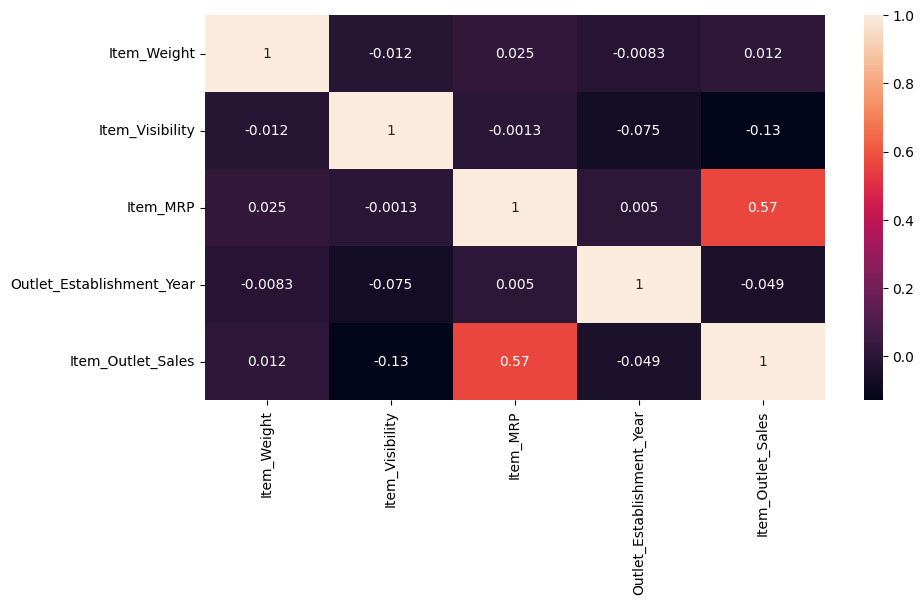

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

## EDA using Klib library

In [ ]:
!pip install klib

In [ ]:
import klib

GridSpec(6, 5)

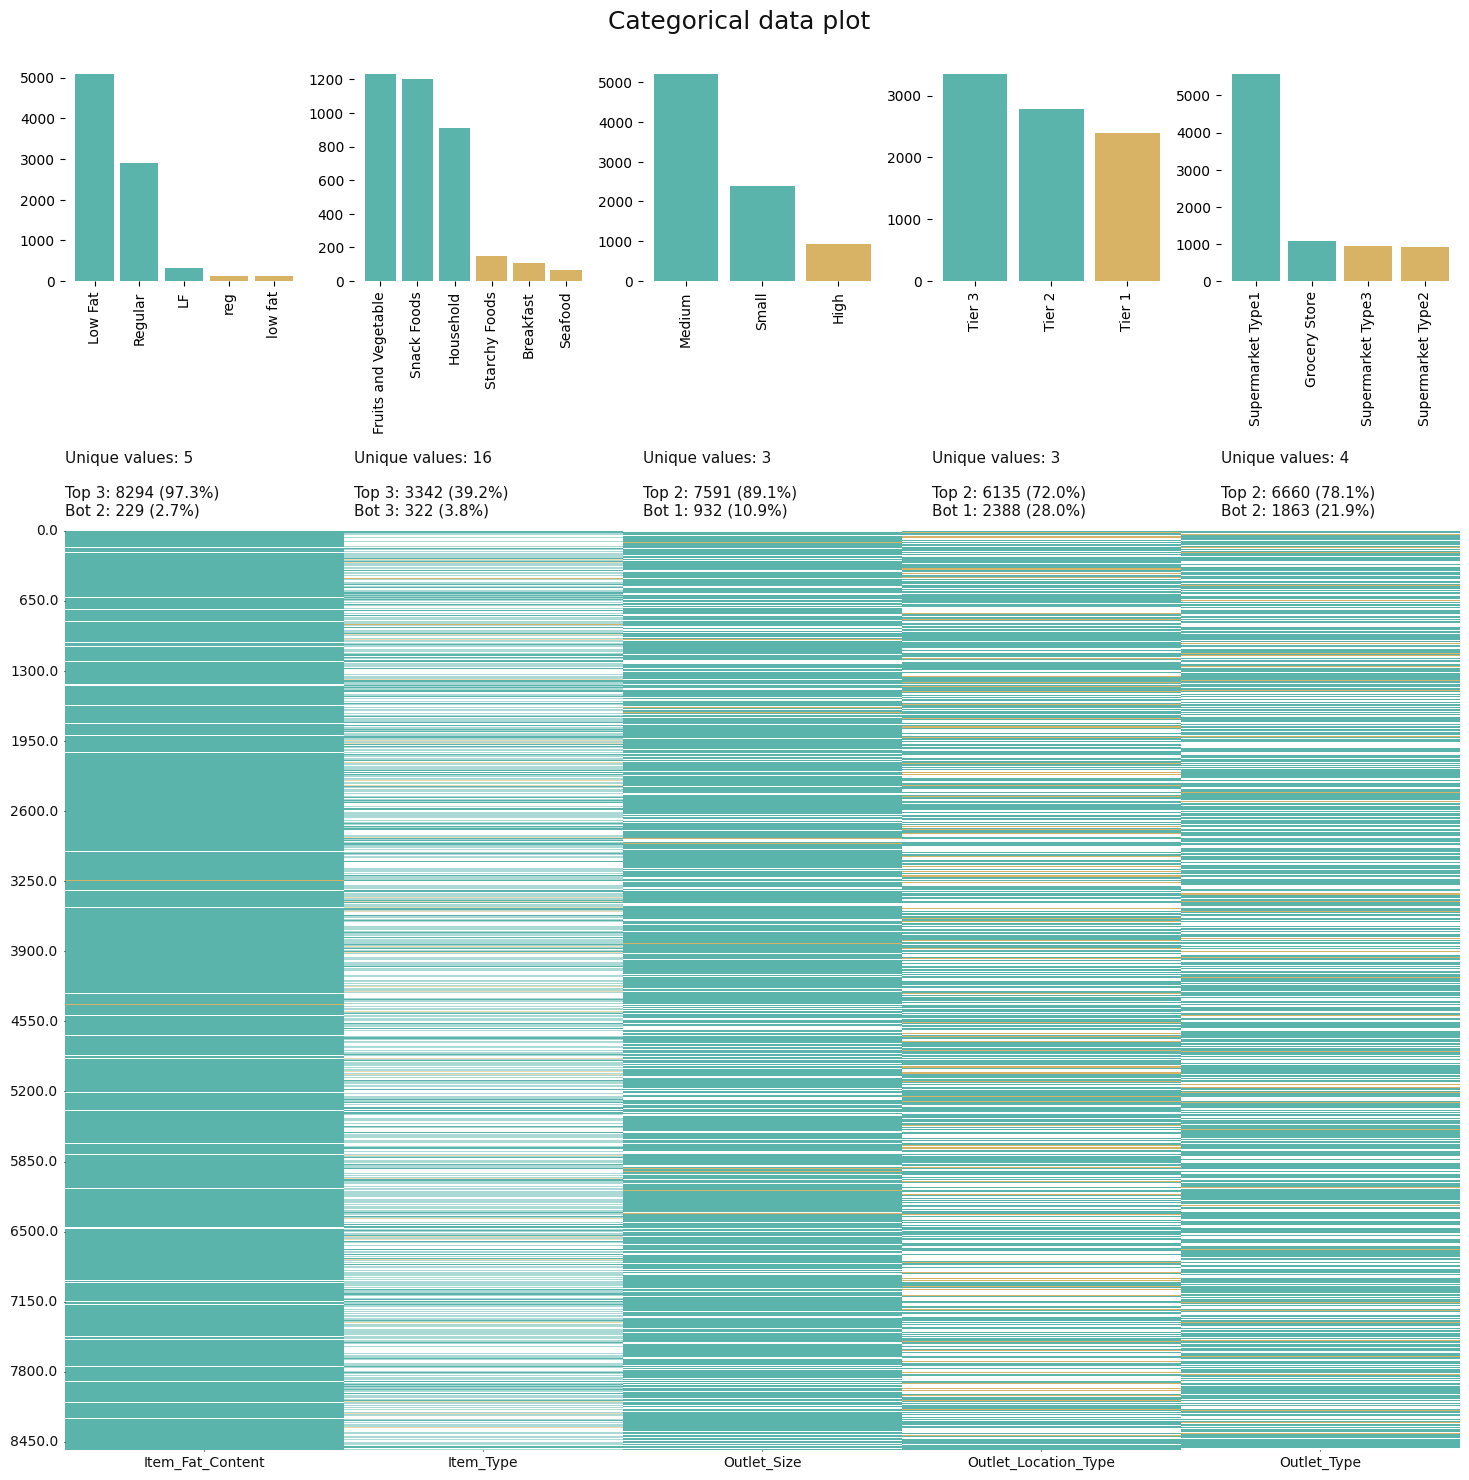

In [ ]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(data) # returns a visualization of the number and frequency of categorical features

In [ ]:
klib.corr_mat(data) # returns a color-encoded correlation matrix

<Axes: title={'center': 'Feature-correlation (pearson)'}>

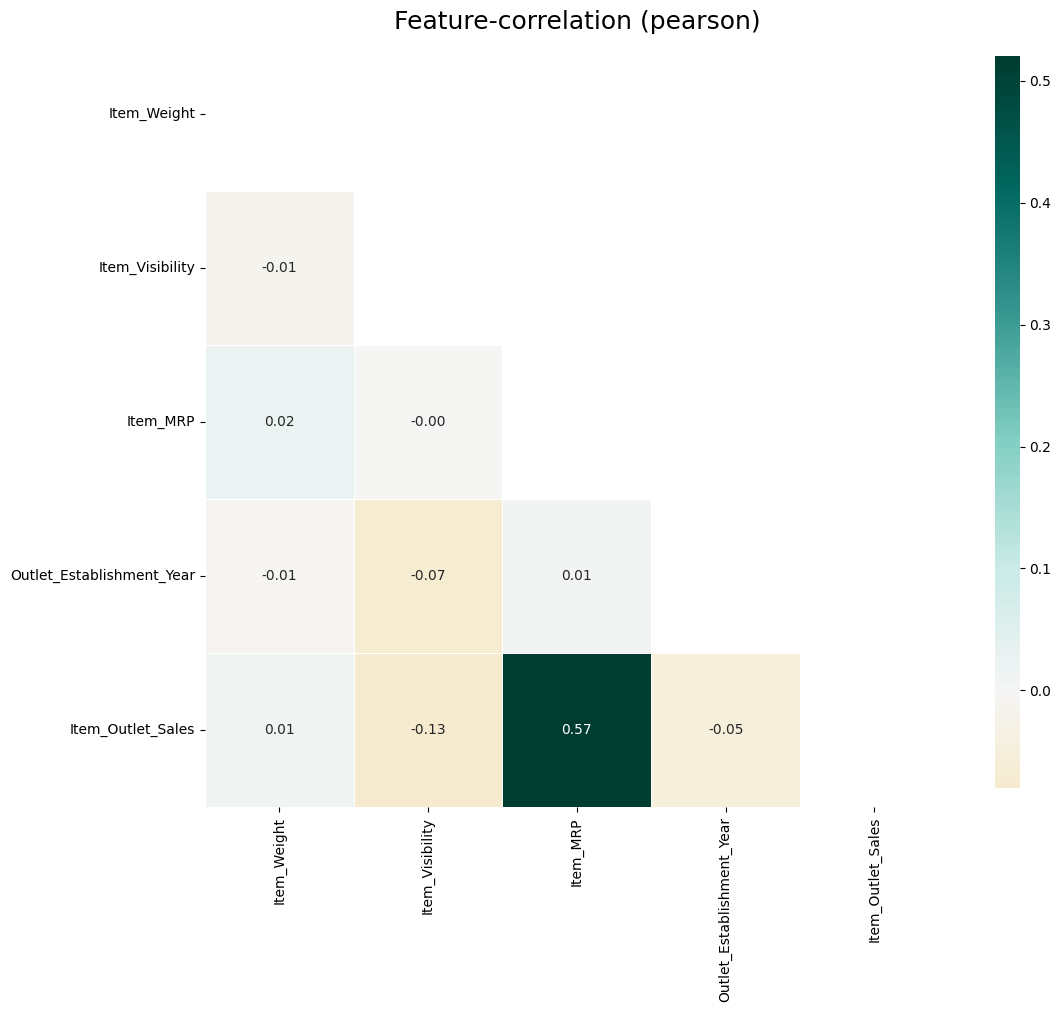

In [ ]:
klib.corr_plot(data) # returns a color-encoded heatmap, ideal for correlations

<Axes: xlabel='Item_Weight', ylabel='Density'>

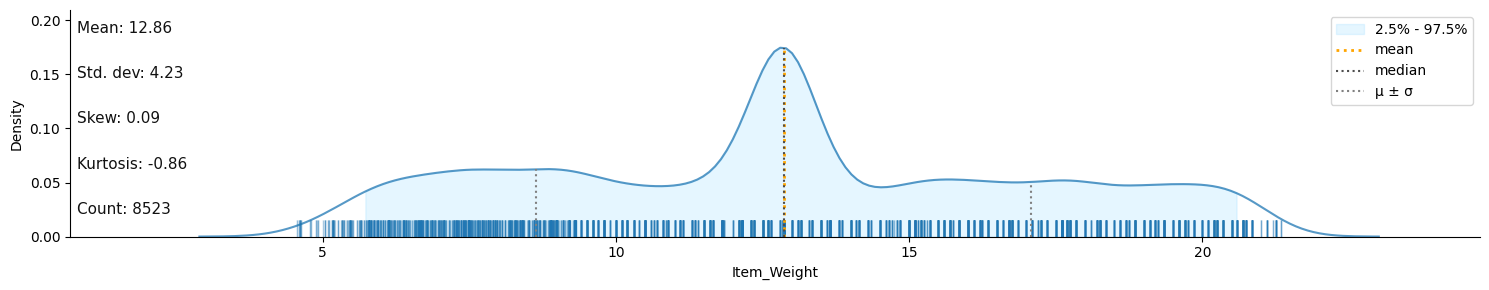

In [ ]:
klib.dist_plot(data) # returns a distribution plot for every numeric feature

In [ ]:
klib.missingval_plot(data) # returns a figure containing information about missing values

No missing values found in the dataset.


## Data cleaning Klib

In [ ]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(data) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [ ]:
klib.clean_column_names(data) # cleans and standardizes column names, also called inside data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
data=klib.convert_datatypes(data) # converts existing to more efficient dtypes, also called inside data_cleaning()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [ ]:
klib.mv_col_handling(data)

item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

##7. Outlier Treatment

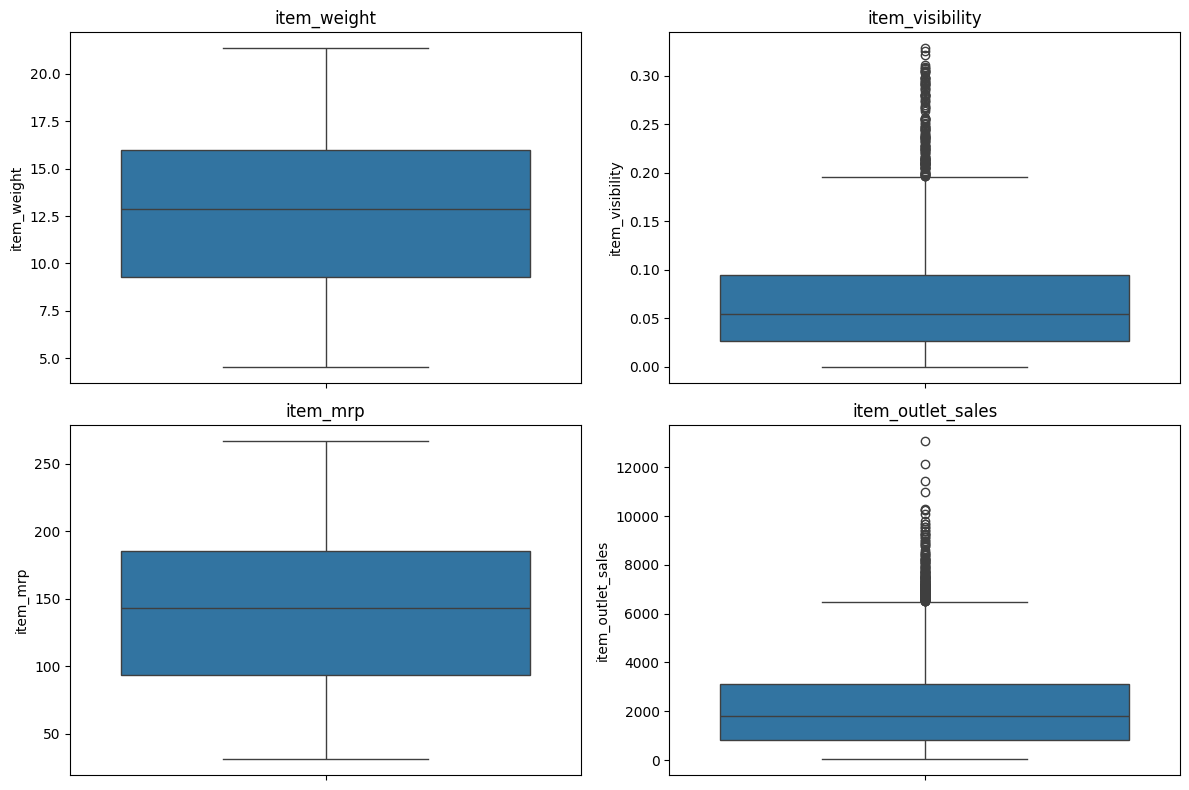

In [ ]:
# Taking Numerical Columns from our Train Data
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
num_plots = len(numerical_columns)

# Calculating rows and columns needed
num_rows = (num_plots // 2) + (num_plots % 2)  # Equivalent to math.ceil(num_plots / 2)
num_cols = 2

plt.figure(figsize=(12, 8))

# Box Plots for each numerical feature
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Calculating Q1, Q3, and IQR for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier threshold
threshold = 1.5

# Identifying outliers using the IQR method
outliers = data[((data[numerical_columns] < (Q1 - threshold * IQR)) |
                       (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

# Removing outliers from the DataFrame
data = data.drop(outliers.index, axis=0)

## 8. Data Pre-Processing

Let's check for distribution of our Target Variable

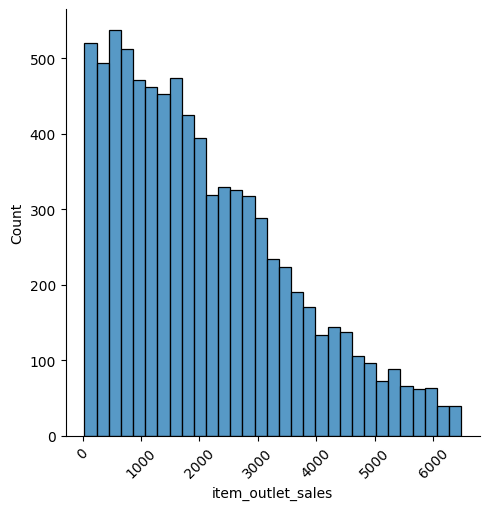

In [ ]:
sns.displot(data['item_outlet_sales'])
plt.xticks(rotation=45)
plt.show()

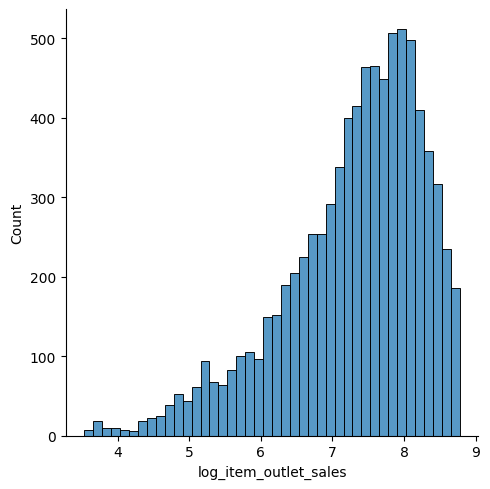

In [ ]:
data['log_item_outlet_sales'] = np.log1p(data['item_outlet_sales'])
sns.displot(data['log_item_outlet_sales'])

In [ ]:
data.drop('item_outlet_sales',axis=1,inplace=True)

In [ ]:
data.head(3)

item_weight item_fat_content  item_visibility    item_type    item_mrp  \
0         9.30          Low Fat         0.016047        Dairy  249.809204   
1         5.92          Regular         0.019278  Soft Drinks   48.269199   
2        17.50          Low Fat         0.016760         Meat  141.617996   

   outlet_establishment_year outlet_size outlet_location_type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   

         outlet_type  log_item_outlet_sales  
0  Supermarket Type1               8.225808  
1  Supermarket Type2               6.096776  
2  Supermarket Type1               7.648869

##(i) Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data['item_fat_content']= le.fit_transform(data['item_fat_content'])
data['item_type']= le.fit_transform(data['item_type'])
data['outlet_size']= le.fit_transform(data['outlet_size'])
data['outlet_location_type']= le.fit_transform(data['outlet_location_type'])
data['outlet_type']= le.fit_transform(data['outlet_type'])

In [ ]:
data.head(5)

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0     9.300000                 1         0.016047          4  249.809204   
1     5.920000                 2         0.019278         14   48.269199   
2    17.500000                 1         0.016760         10  141.617996   
3    19.200001                 2         0.000000          6  182.095001   
4     8.930000                 1         0.000000          9   53.861401   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   log_item_outlet_sales  
0               8.225808  
1               6.096776  
2               7.648869  
3               6.597664  
4               6.903451

##(ii) Splitting our Data into Train and Test Set

In [ ]:
X=data.drop('log_item_outlet_sales',axis=1)

In [ ]:
Y=data['log_item_outlet_sales']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

## (iii)Standarization

In [ ]:
X.describe()

item_weight  item_fat_content  item_visibility    item_type  \
count  8193.000000       8193.000000      8193.000000  8193.000000   
mean     12.863933          1.369096         0.063221     7.230807   
std       4.266983          0.646114         0.046285     4.205862   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.300000          1.000000         0.026818     4.000000   
50%      12.857645          1.000000         0.052729     6.000000   
75%      16.100000          2.000000         0.092783    10.000000   
max      21.350000          4.000000         0.195721    15.000000   

          item_mrp  outlet_establishment_year  outlet_size  \
count  8193.000000                8193.000000  8193.000000   
mean    139.104034                1998.089711     1.166972   
std      61.536438                   8.286946     0.602483   
min      31.290001                1985.000000     0.000000   
25%      92.980400                1987.000000     1.000000   
50%     141.147003                1999.000000     1.000000   
75%     183.663406                2004.000000     2.000000   
max     266.888397                2009.000000     2.000000   

       outlet_location_type  outlet_type  
count           8193.000000  8193.000000  
mean               1.106432     1.201391  
std                0.808825     0.770211  
min                0.000000     0.000000  
25%                0.000000     1.000000  
50%                1.000000     1.000000  
75%                2.000000     1.000000  
max                2.000000     3.000000

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features for better performance
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.52042233, -0.57227437, -0.80388948, ..., -0.277462  ,
        -0.13721107, -0.26362805],
       [-0.46531003, -0.57227437,  1.56414571, ..., -1.94579774,
         1.10146849, -0.26362805],
       [ 0.28741287, -0.57227437, -1.36882642, ..., -0.277462  ,
        -1.37589063, -0.26362805],
       ...,
       [ 1.63785181, -0.57227437, -0.20492877, ..., -0.277462  ,
         1.10146849,  1.02578856],
       [-0.37019222, -0.57227437, -1.21265847, ...,  1.39087374,
        -0.13721107, -0.26362805],
       [ 1.2620774 , -0.57227437,  0.32948074, ..., -1.94579774,
         1.10146849, -0.26362805]])

##9. Model Building

In [ ]:
from sklearn.metrics import mean_squared_error

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
linreg = LinearRegression()

# Training the model
linreg.fit(X_train_scaled, Y_train)

# Predicting the target values for the test set
y_pred_linreg = linreg.predict(X_test_scaled)

# Calculating RMSE score
rmse_linreg = np.sqrt(mean_squared_error(Y_test, y_pred_linreg))

# Printing RMSE score
print("RMSE Score:", rmse_linreg)

RMSE Score: 0.6515753927770543


##Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest model
rf = RandomForestRegressor()

# Training the model
rf.fit(X_train_scaled, Y_train)

# Predicting the target values for the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculating RMSE score
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))

# Printing RMSE score for Random Forest
print("Random Forest RMSE Score:", rmse_rf)

Random Forest RMSE Score: 0.5340761243384361


##XGBoost Model

In [ ]:
import xgboost as xgb

# Initializing the XGBoost model
xgboost_model = xgb.XGBRegressor()

# Training the model
xgboost_model.fit(X_train_scaled, Y_train)

# Predicting the target values for the test set
y_pred_xgb = xgboost_model.predict(X_test_scaled)

# Calculating RMSE score
rmse_xgb = np.sqrt(mean_squared_error(Y_test, y_pred_xgb))

# Printing RMSE score for XGBoost
print("XGBoost RMSE Score:", rmse_xgb)

XGBoost RMSE Score: 0.5394871


##CatBoostModel

In [ ]:
!pip install CatBoost

In [ ]:
from catboost import CatBoostRegressor

# Initializing CatBoost model
catboost_model = CatBoostRegressor()

# Training the model
catboost_model.fit(X_train_scaled, Y_train)

# Predicting on test data
y_pred_catboost = catboost_model.predict(X_test_scaled)

# Calculating RMSE
rmse_catboost = np.sqrt(mean_squared_error(Y_test, y_pred_catboost))

# Print RMSE score
print("CatBoost RMSE Score:", rmse_catboost)

Learning rate set to 0.055105
0:	learn: 0.9466411	total: 50.8ms	remaining: 50.7s
1:	learn: 0.9127907	total: 56.7ms	remaining: 28.3s
2:	learn: 0.8809057	total: 62.8ms	remaining: 20.9s
3:	learn: 0.8533396	total: 68ms	remaining: 16.9s
4:	learn: 0.8282998	total: 72.1ms	remaining: 14.3s
5:	learn: 0.8028799	total: 76.9ms	remaining: 12.7s
6:	learn: 0.7808263	total: 83.3ms	remaining: 11.8s
7:	learn: 0.7590675	total: 89.4ms	remaining: 11.1s
8:	learn: 0.7387044	total: 95.4ms	remaining: 10.5s
9:	learn: 0.7202978	total: 104ms	remaining: 10.3s
10:	learn: 0.7024594	total: 110ms	remaining: 9.88s
11:	learn: 0.6870004	total: 116ms	remaining: 9.58s
12:	learn: 0.6724330	total: 119ms	remaining: 9.04s
13:	learn: 0.6590200	total: 122ms	remaining: 8.57s
14:	learn: 0.6465321	total: 136ms	remaining: 8.9s
15:	learn: 0.6354138	total: 148ms	remaining: 9.09s
16:	learn: 0.6254175	total: 154ms	remaining: 8.88s
17:	learn: 0.6161591	total: 160ms	remaining: 8.74s
18:	learn: 0.6073283	total: 168ms	remaining: 8.69s
19:	l

##10. Model Comparison

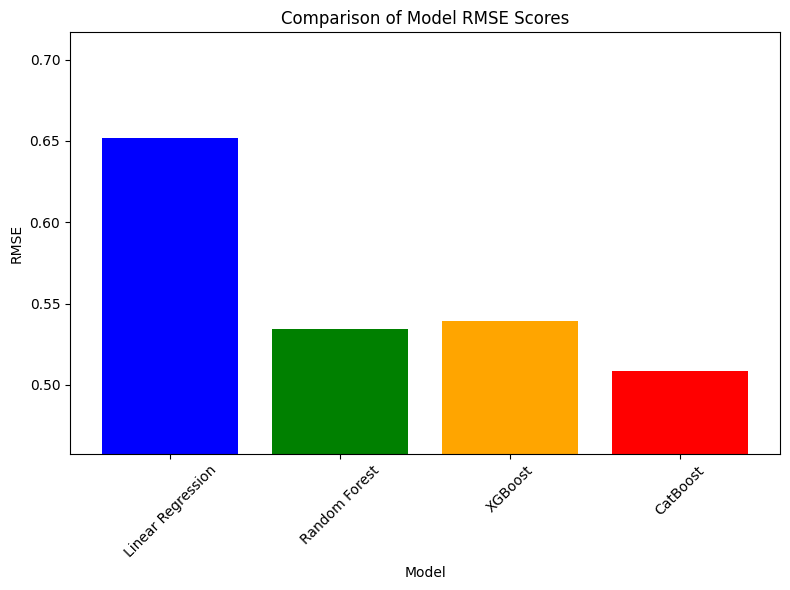

In [ ]:
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'CatBoost']
rmse_scores = [rmse_linreg, rmse_rf, rmse_xgb, rmse_catboost]

# Creating a DataFrame to store model names and RMSE scores
results_df = pd.DataFrame({'Model': model_names, 'RMSE': rmse_scores})

# Plotting the RMSE scores
plt.figure(figsize=(8, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Model RMSE Scores')
plt.ylim(min(rmse_scores) * 0.9, max(rmse_scores) * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##In this Project, we have predicted the Sales of a BigMart Store using Machine Learning Techniques